# Exploring Covid-19 

Let's look at the trends in Covid-19 confirmed cases and deaths over time, and among different states.

### First, we import the usual modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


### We have data for both the running totals and the daily totals.  Let's load them both.

In [3]:
total_data = pd.read_csv('data/covid_confirmed_and_deaths_US_by_state_total.csv')
daily_data = pd.read_csv('data/covid_confirmed_and_deaths_US_by_state_daily.csv')

In [18]:
total_data

,State,Population,Confirmed,Deaths
timestamp,,,,
2020-01-22,Alabama,4903185,0,0
2020-01-22,Alaska,731545,0,0
2020-01-22,Arizona,7278717,0,0
2020-01-22,Arkansas,3017804,0,0
2020-01-22,California,39512223,0,0
...,...,...,...,...
2020-07-18,Virginia,8535519,76373,2025
2020-07-18,Washington,7614893,45943,1444
2020-07-18,West Virginia,1792147,4894,100


### Convert the Date to a datetime, and change that to be the index

In [4]:
total_data['timestamp'] = pd.to_datetime(total_data['Date'])
daily_data['timestamp'] = pd.to_datetime(total_data['Date'])

In [5]:
total_data.head()

,Date,State,Population,Confirmed,Deaths,timestamp
0,1/22/20,Alabama,4903185,0,0,2020-01-22
1,1/22/20,Alaska,731545,0,0,2020-01-22
2,1/22/20,Arizona,7278717,0,0,2020-01-22
3,1/22/20,Arkansas,3017804,0,0,2020-01-22
4,1/22/20,California,39512223,0,0,2020-01-22


In [6]:
total_data.index = total_data['timestamp']
total_data = total_data.drop(columns='timestamp')
total_data = total_data.drop(columns='Date')

daily_data.index = daily_data['timestamp']
daily_data = daily_data.drop(columns='timestamp')
daily_data = daily_data.drop(columns='Date')


In [7]:
total_data.head()
daily_data.head()

,State,Population,Confirmed,Deaths
timestamp,,,,
2020-01-22,Alabama,4903185,0,0
2020-01-22,Alaska,731545,0,0
2020-01-22,Arizona,7278717,0,0
2020-01-22,Arkansas,3017804,0,0
2020-01-22,California,39512223,0,0


### Get the total numbers and the daily numbers for the state of Illinois

In [11]:
il_total_deaths = total_data[total_data['State'] == "Illinois"]
il_total_deaths

,State,Population,Confirmed,Deaths
timestamp,,,,
2020-01-22,Illinois,12671821,0,0
2020-01-23,Illinois,12671821,0,0
2020-01-24,Illinois,12671821,1,0
2020-01-25,Illinois,12671821,1,0
2020-01-26,Illinois,12671821,1,0
...,...,...,...,...
2020-07-14,Illinois,12671821,155461,7218
2020-07-15,Illinois,12671821,156652,7226
2020-07-16,Illinois,12671821,157927,7251


In [1]:
il_daily_deaths = daily_data[(daily_data['State'] == "Illinois")]
il_daily_deaths

NameError: name 'daily_data' is not defined

### Plot the daily confirmed cases for Illinois

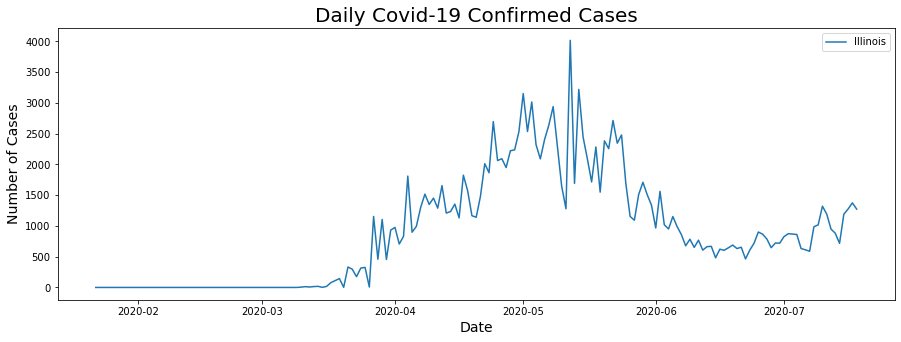

In [13]:

plt.plot(il_daily_deaths.index, il_daily_deaths['Confirmed'], label="Illinois")

plt.legend()

plt.title("Daily Covid-19 Confirmed Cases", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 

### This is a bit messy.  Let's plot the rolling 7-day average.

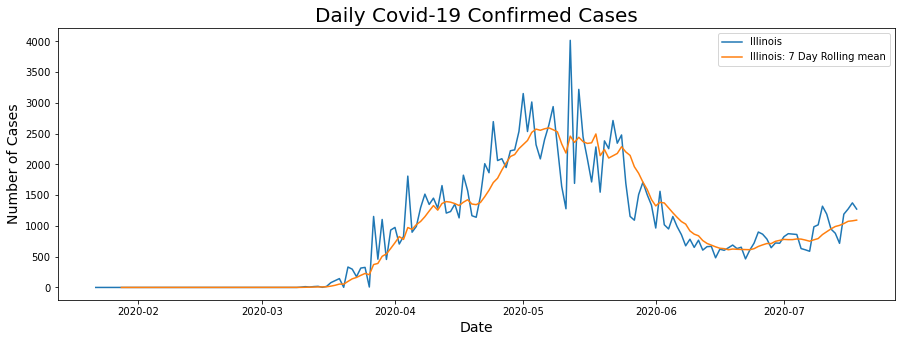

In [14]:

plt.plot(il_daily_deaths.index, il_daily_deaths['Confirmed'], label="Illinois")

# Use a variable for the window size, so that we can easily change later, if we want
window_size = 7
label_string="%s: %s Day Rolling mean" % ("Illinois", window_size)
plt.plot(il_daily_deaths['Confirmed'].rolling(window_size).mean(), label=label_string)

plt.legend()

plt.title("Daily Covid-19 Confirmed Cases", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 

### To compare Illinois to another state, repeat the process for a different state.  

In [15]:
# Use a variable for the other state's name, 
# so we can easily change it out later to compare different states.

state2 = "New York"
state2_daily_deaths = daily_data[daily_data['State'] == state2]

### Add state2 to the same plot as the Illinois numbers

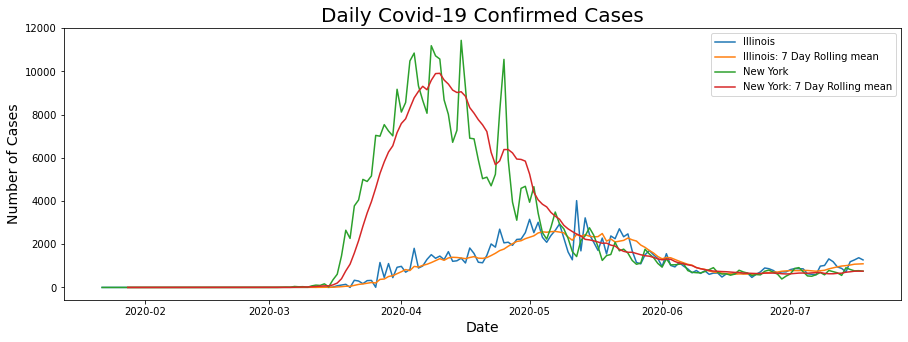

In [16]:
plt.plot(il_daily_deaths.index, il_daily_deaths['Confirmed'], label="Illinois")

window_size = 7
label_string="%s: %s Day Rolling mean" % ("Illinois", window_size)
plt.plot(il_daily_deaths['Confirmed'].rolling(window_size).mean(), label=label_string)

# add state2
plt.plot(state2_daily_deaths.index, state2_daily_deaths['Confirmed'], label=state2)

# add a label and plot for rolling mean for state2
state2_label_string="%s: %s Day Rolling mean" % (state2, window_size)
plt.plot(state2_daily_deaths['Confirmed'].rolling(window_size).mean(), label=state2_label_string)


plt.legend()

plt.title("Daily Covid-19 Confirmed Cases", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 

### We can do the same thing for deaths, by changing 'Confirmed' to 'Deaths' in the plot lines.

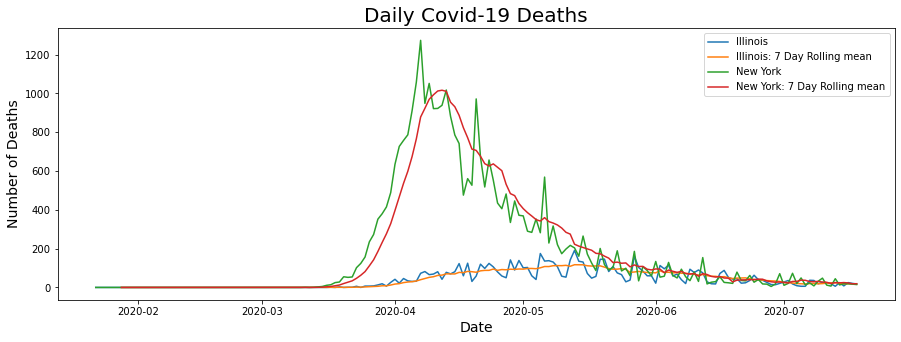

In [17]:
plt.plot(il_daily_deaths.index, il_daily_deaths['Deaths'], label="Illinois")

window_size = 7
label_string="%s: %s Day Rolling mean" % ("Illinois", window_size)
plt.plot(il_daily_deaths['Deaths'].rolling(window_size).mean(), label=label_string)

# add state2
plt.plot(state2_daily_deaths.index, state2_daily_deaths['Deaths'], label=state2)

# add a label and plot for rolling mean for state2
state2_label_string="%s: %s Day Rolling mean" % (state2, window_size)
plt.plot(state2_daily_deaths['Deaths'].rolling(window_size).mean(), label=state2_label_string)


plt.legend()

plt.title("Daily Covid-19 Deaths", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 

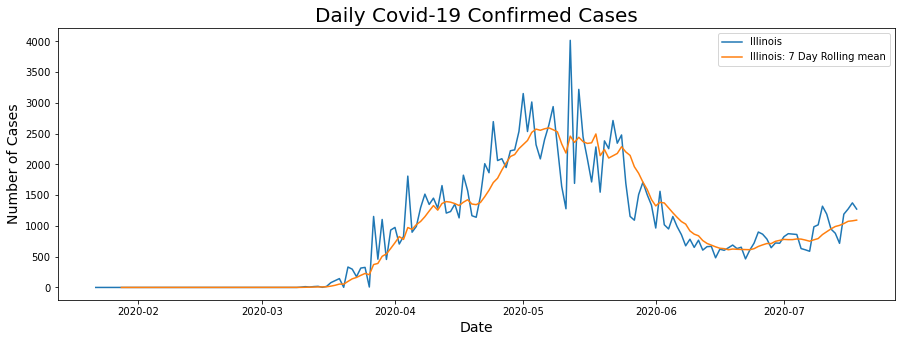

In [18]:
#plt.plot(il_total_deaths.index, il_total_deaths['Deaths'], label="Illinois Total Deaths")
#plt.plot(il_total_deaths.index, il_total_deaths['Confirmed'], label="Illinois Total Confirmed")

#plt.plot(il_daily_deaths.index, il_daily_deaths['Deaths'], label="Illinois Daily Deaths")

plt.plot(il_daily_deaths.index, il_daily_deaths['Confirmed'], label="Illinois")

#plt.plot(state2_daily_deaths.index, state2_daily_deaths['Confirmed'], label=state2)

window_size = 7
label_string="%s: %s Day Rolling mean" % ("Illinois", window_size)
plt.plot(il_daily_deaths['Confirmed'].rolling(window_size).mean(), label=label_string)
state2_label_string="%s: %s Day Rolling mean" % (state2, window_size)
#plt.plot(state2_daily_deaths['Confirmed'].rolling(window_size).mean(), label=state2_label_string)


plt.legend()

plt.title("Daily Covid-19 Confirmed Cases", fontsize=20)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14);

fig = plt.gcf()
fig.set_size_inches(15, 5) 